<a href="https://colab.research.google.com/github/LudwigMeder/Time-Series-Prediction-of-the-NAO/blob/main/1_DatasetCharacteristics/Nino_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nino 3.4 Index  
- Motivation  
- Loading Data  
- Editing Data
- Basic Statistics and Visualisations

# Motivation
El Nino - Southern Oszillation (ENSO) is a mayor climate variability and influences many phenomena around the globe and therefore the NAO as well. Thus, we want to use the Nino 3.4 index as additional time series to improve the prediction of the NAO.  
The following code shows how we get access to this time series.

# Loading Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data',skiprows=1,skipfooter=7, delim_whitespace=True, header=None)
df

<ipython-input-3-6bee450431e6>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data',skiprows=1,skipfooter=7, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020,0.64,0.48,0.36,0.49,-0.12,-0.21,-0.04,-0.42,-0.66,-1.19,-1.01,-0.98
151,2021,-1.04,-0.94,-0.72,-0.55,-0.41,-0.06,-0.20,-0.38,-0.50,-0.78,-0.88,-1.07
152,2022,-0.77,-0.68,-0.84,-0.90,-1.02,-0.77,-0.56,-0.96,-1.06,-0.99,-0.76,-0.86
153,2023,-0.78,-0.62,-0.13,0.24,0.47,0.95,1.20,1.56,1.65,1.59,2.01,1.81


# Editing Data

In [4]:
new_column_names = ['Year', 'January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.columns = new_column_names
df.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


In [5]:
# Reshape the DataFrame from wide to long format
df_long = df.melt(id_vars=['Year'], var_name='Month', value_name='Nino_index')

# Create a datetime column
df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'], format='%Y-%B')

# Drop the now redundant 'Year' and 'Month' columns
df_long = df_long.drop(columns=['Year', 'Month'])

# Sort the DataFrame by the new 'Date' column
df_long = df_long.sort_values(by='Date').reset_index(drop=True)
df_long.set_index('Date', inplace=True)
df_long

,Nino_index
Date,
1870-01-01,-1.00
1870-02-01,-1.20
1870-03-01,-0.83
1870-04-01,-0.81
1870-05-01,-1.27
...,...
2024-08-01,-99.99
2024-09-01,-99.99
2024-10-01,-99.99


In [7]:
# set unrealistic values (e.g. future values) to nan
df_long[df_long['Nino_index']==-99.99] = np.nan
df_long

,Nino_index
Date,
1870-01-01,-1.00
1870-02-01,-1.20
1870-03-01,-0.83
1870-04-01,-0.81
1870-05-01,-1.27
...,...
2024-08-01,NaN
2024-09-01,NaN
2024-10-01,NaN


# Basic Statistics and Visualisations

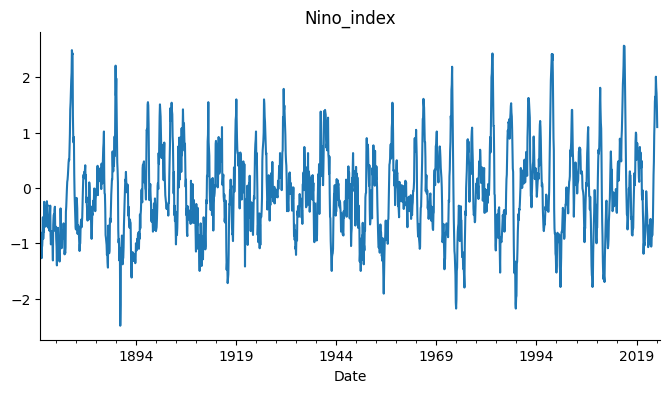

In [10]:
df_long['Nino_index'].plot(kind='line', figsize=(8, 4), title='Nino_index')
plt.gca().spines[['top', 'right']].set_visible(False)

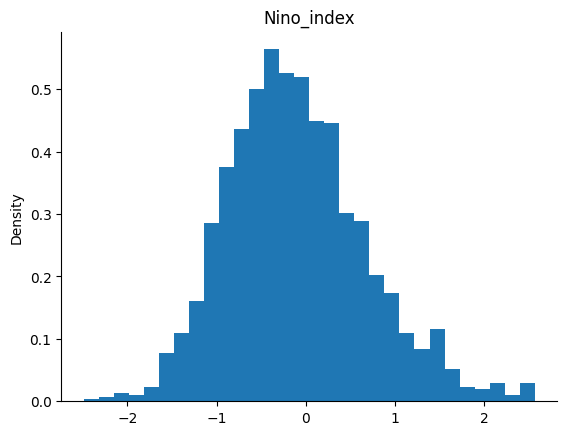

In [16]:
#df_long['Nino_index'].plot(kind='hist', bins=30, title='Nino_index')
plt.hist(df_long['Nino_index'],bins=30,density=True)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Nino_index')
plt.ylabel('Density')
plt.show()